# Titanic Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading csv files 
df=pd.read_csv("train.csv")

In [3]:
#looking at the top 5 data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# looking at the datatypes of all columns 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#checking for the null values 
#there are total of 891 rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see among 12 columns there is null values in column age , Cabin and embarked.

In [6]:
## making sure if age, cabin and embarked contains null values
df.isnull().sum()*100/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Here we can see Age contains 19.86 % null values while Embarked contains 0.22% null values and Cabin contains the highest amount of null values with 77.1%

In [7]:
#filling null values in age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [8]:
df['Age'] = df['Age'].astype(int)

In [9]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [10]:
# to fill embarked column checking the value that appears most often and filling with that 
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
# filling embarked with S
df['Embarked'] = df['Embarked'].fillna('S')

In [12]:
#### Drop the Cabin column as there are many null values and it does not help in making prediction
df.drop('Cabin',axis=1,inplace=True)

In [13]:
## once again checking whether the null values are filled or not in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(2), int64(5), object(3)
memory usage: 69.7+ KB


Therefore all null values are filled and unnecessary column is removed.

In [14]:
#checking for duplicates
sum(df.duplicated(subset = 'PassengerId'))

0

There are no duplicates. But incase of duplicates to remove duplicates we can use : 
df=df.drop_duplicates(keep='first')

In [15]:
# Combine SibSp and Parch became the Relatives Column
data = [df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'

In [16]:
#Changing cateogorcial data to 'string' type categorical data
df['Pclass'][df['Pclass'] == 3] = 'High Class'
df['Pclass'][df['Pclass'] == 2] = 'Middle Class'
df['Pclass'][df['Pclass'] == 1] = 'Low Class'

df['relatives'][df['relatives'] == 0] = 'Travel Alone'
df['relatives'][df['relatives'] == 1] = 'brothers'
df['relatives'][df['relatives'] == 2] = 'sisters'
df['relatives'][df['relatives'] == 3] = 'wife'
df['relatives'][df['relatives'] == 4] = 'husband'
df['relatives'][df['relatives'] == 5] = 'father'
df['relatives'][df['relatives'] == 6] = 'mother'
df['relatives'][df['relatives'] == 7] = 'descendants'
df['relatives'][df['relatives'] == 10] = 'others'


C:\Users\Acer\AppData\Local\Temp\ipykernel_11572\3918984083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pclass'][df['Pclass'] == 3] = 'High Class'
C:\Users\Acer\AppData\Local\Temp\ipykernel_11572\3918984083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relatives'][df['relatives'] == 0] = 'Travel Alone'


In [17]:
# Dropping Unuseful feature because it has too many missed values:

df.drop(columns = ["Ticket"] , inplace = True)
df.drop(columns = ["SibSp"] , inplace = True)
df.drop(columns = ["Parch"] , inplace = True)

# Describing Data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    object 
 3   Name             891 non-null    object 
 4   Sex              891 non-null    int32  
 5   Age              891 non-null    int32  
 6   Fare             891 non-null    float64
 7   Embarked         891 non-null    object 
 8   relatives        891 non-null    object 
 9   travelled_alone  891 non-null    object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 62.8+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Sex,891.0,0.352413,0.477990,0.0,0.0000,0.0000,1.0,1.0000
Age,891.0,29.544332,13.013778,0.0,22.0000,29.0000,35.0,80.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [20]:
data_num = df.select_dtypes(include=['int64','int32' ,'float64'])
data_cat = df.select_dtypes(include=['object'])
data_num.columns,data_cat.columns 

(Index(['PassengerId', 'Survived', 'Sex', 'Age', 'Fare'], dtype='object'),
 Index(['Pclass', 'Name', 'Embarked', 'relatives', 'travelled_alone'], dtype='object'))

Mode

In [21]:
data_num.mode().iloc[0].reset_index(name= 'Mode')

,index,Mode
0,PassengerId,1.00
1,Survived,0.00
2,Sex,0.00
3,Age,29.00
4,Fare,8.05


In [22]:
data_cat.mode().iloc[0].reset_index(name= 'Mode')

,index,Mode
0,Pclass,High Class
1,Name,"Abbing, Mr. Anthony"
2,Embarked,S
3,relatives,Travel Alone
4,travelled_alone,Yes


Variance

In [23]:
data_num.var()

PassengerId    66231.000000
Survived           0.236772
Sex                0.228475
Age              169.358426
Fare            2469.436846
dtype: float64

Standard Deviation

In [24]:
np.sqrt(data_num.var())

PassengerId    257.353842
Survived         0.486592
Sex              0.477990
Age             13.013778
Fare            49.693429
dtype: float64

InterQuartileRange (IQR)


In [25]:
print('Inter Quartile Range (IQR):')
data_num.quantile(0.75)-data_num.quantile(0.25)

Inter Quartile Range (IQR):


PassengerId    445.0000
Survived         1.0000
Sex              1.0000
Age             13.0000
Fare            23.0896
dtype: float64

Probability


In [26]:
N1 = 891
e1 = 0.05

slovin = N1/(1+N1 * e1**2)
print('probability =',slovin),
(slovin/891)

probability = 276.0650658404337


0.3098373353989155

In [27]:
A_number = 0.3098373353989155
percentage = "{:.0%}".format(A_number)
print(percentage)

31%


the Datasets have 31 % of Probability

# EDA (Exploratory Data Analysis)
It is a method used to analyze and summarize datasets.


### Piechart


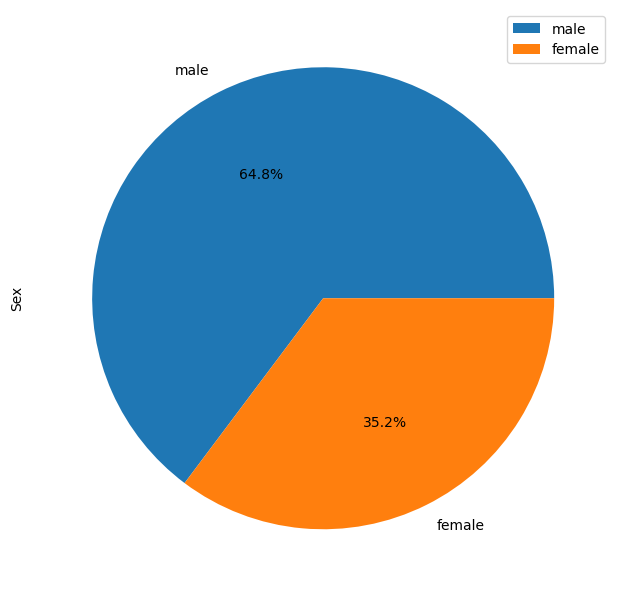

<Figure size 640x480 with 0 Axes>

In [83]:
df_sym = pd.DataFrame(df['Sex'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

We can see that there are more male than female.

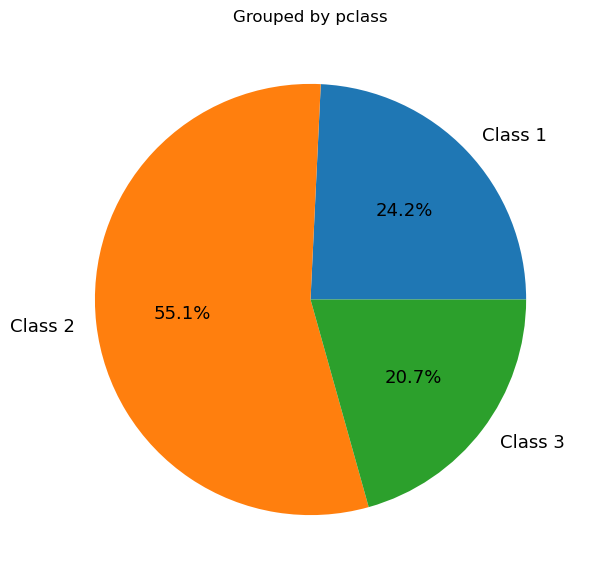

In [84]:
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

There are more people in class 3.


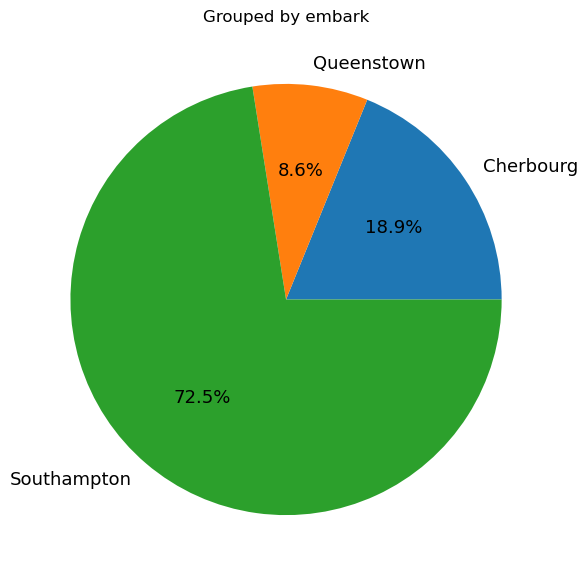

In [85]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
embark_count = df.groupby('Embarked')['Embarked'].count()
plt.figure(figsize=(7,7))
plt.title('Grouped by embark')
plt.pie(embark_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

There are more people from Southampton

### Barplot
The barplot() shows the relation between a categorical variable and a continuous variable. The data is represented in rectangular bars where the length the bar represents the proportion of the data in that category. Bar plot represents the estimate of central tendency.

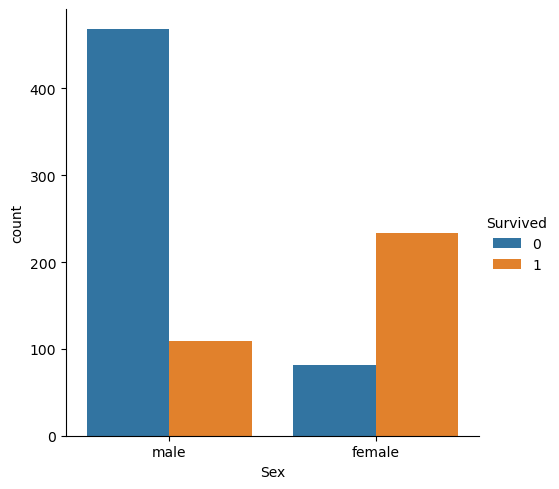

In [86]:
##checking whether there is relation between survival and gender
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

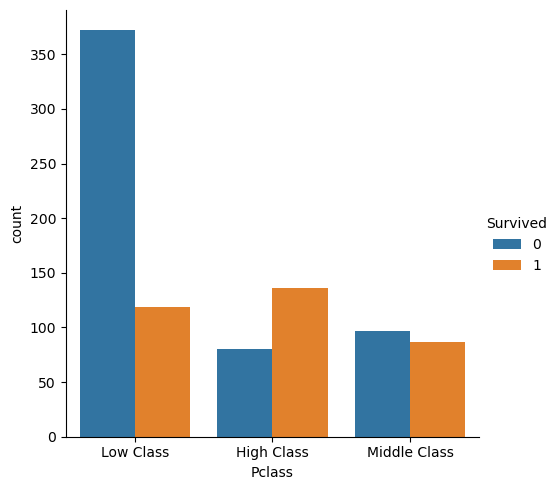

In [87]:
##checking whether there is relation between survival and Pclass
sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = df)

We can see that survival rate is higher in class 1.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

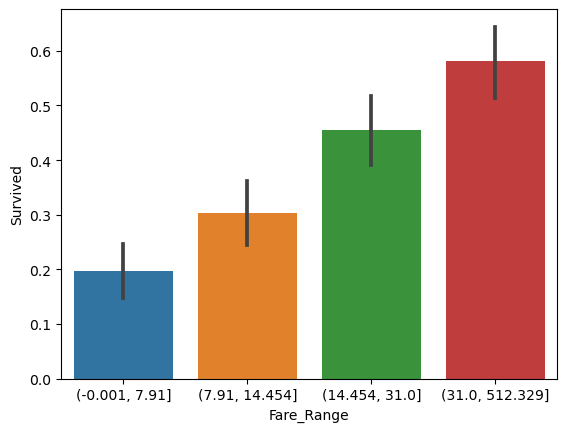

In [89]:

# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = df)

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

<AxesSubplot:xlabel='Age_Range', ylabel='Survived'>

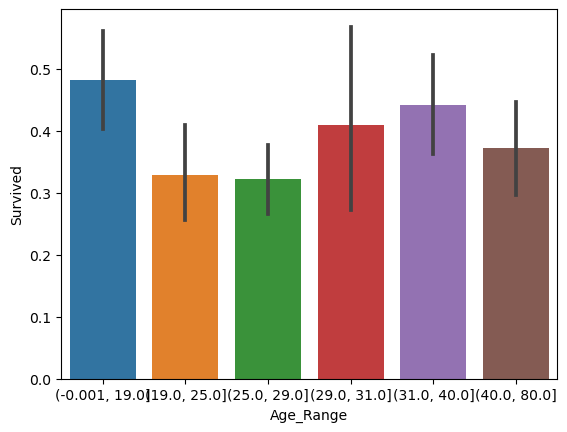

In [90]:

# Divide Age into 4 bins
df['Age_Range'] = pd.qcut(df['Age'], 6)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Age_Range', y ='Survived',
data = df)

We can see that the survival rate of people of age 19-30 is significantly loer than others.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


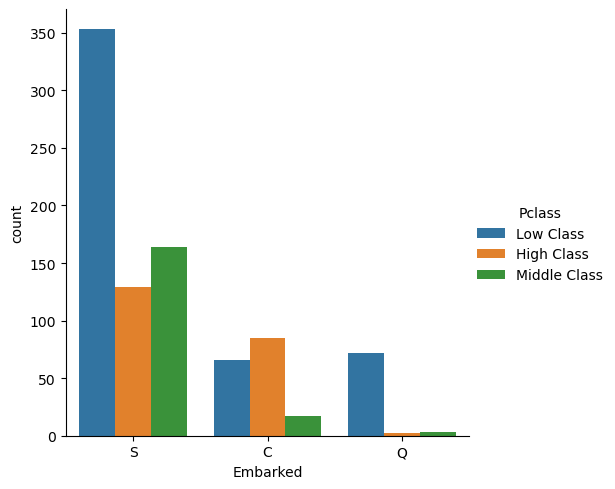

In [91]:
sns.catplot("Embarked", data=df, kind='count',hue='Pclass', row_order=['C','Q','S']);

Comparatively Most people from QueenStown took class 3 .

### Heatmap 


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

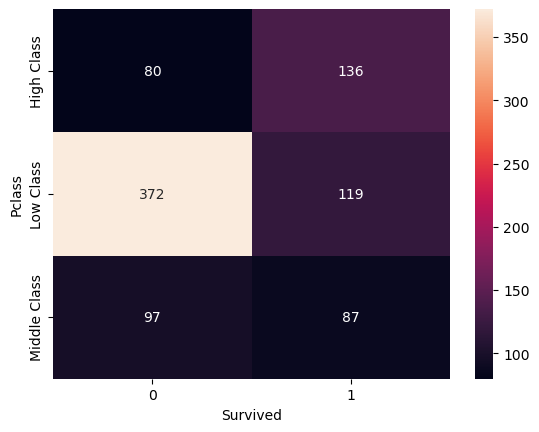

In [92]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate

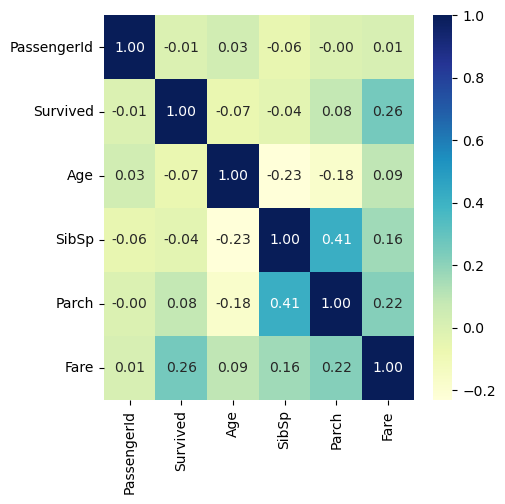

In [93]:
## checking correlation between different columns
plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

### Point plot

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


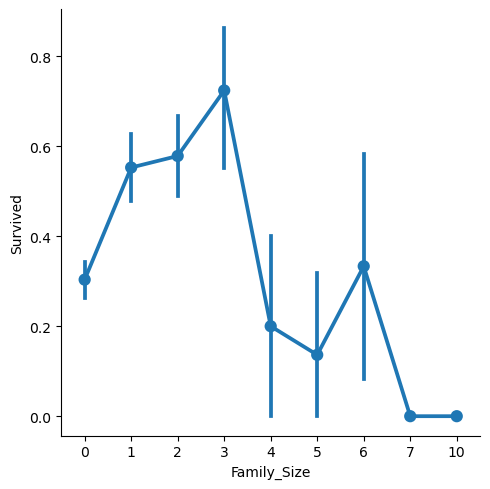

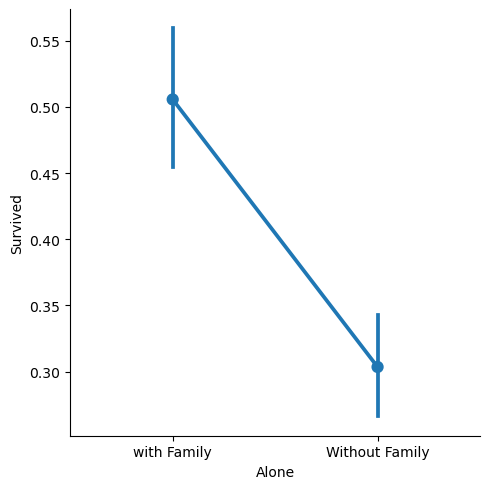

In [94]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']
 
# Adding a column Alone
df['Alone'] = 'with Family'
df.loc[df.Family_Size == 0, 'Alone'] = 'Without Family'
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = df)
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = df)

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

Important observations – 

* If a passenger is alone, the survival rate is less.
* If the family size is greater than 5, chances of survival decrease considerably.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


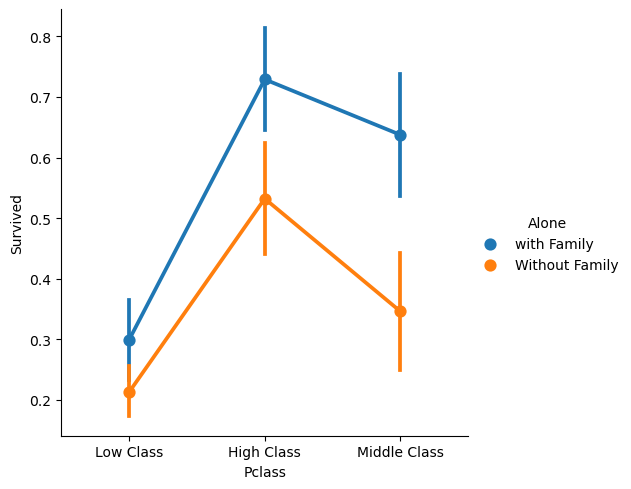

In [95]:
sns.factorplot('Pclass','Survived',data=df,hue='Alone')

The survival rates are higher if they are with family.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


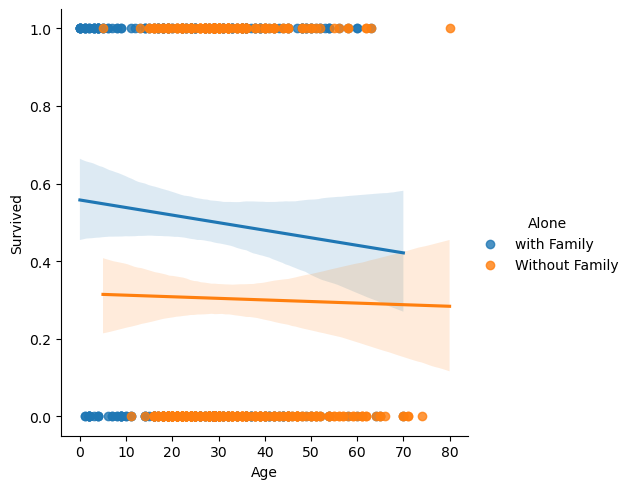

In [121]:
sns.lmplot('Age','Survived',data=df,hue='Alone')

With increase in age there is decrease in survival rates. However Survival rate is higher with family

<AxesSubplot:>

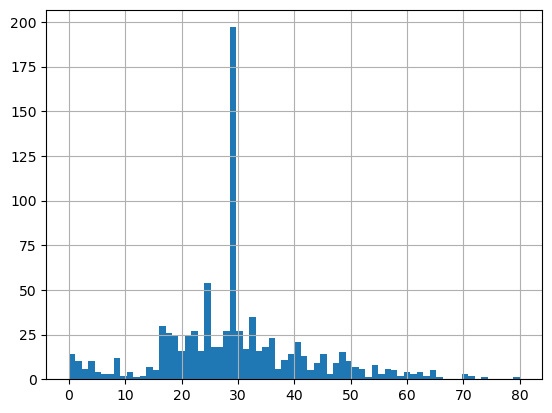

In [96]:
# check the ages of the passengers to look at the distribution
df['Age'].hist(bins=70)

We can see most of the passengers were young and were in between 20–30 years of age.

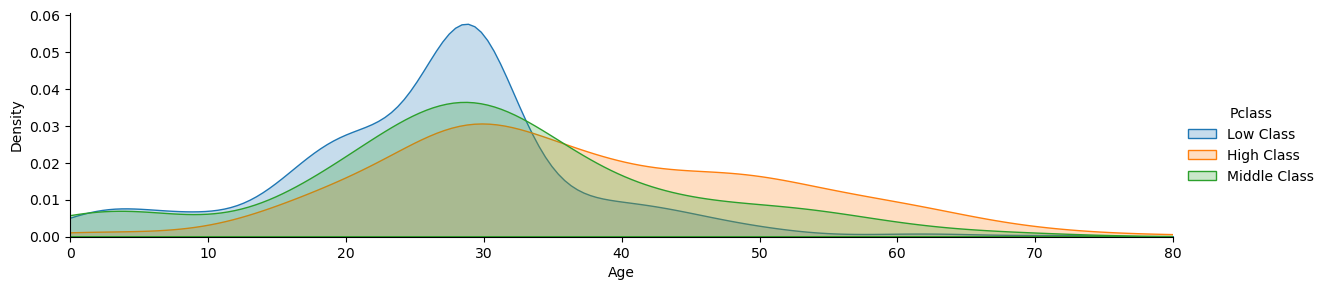

In [97]:

fig = sns.FacetGrid(df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend();

Similarly we can see most people of age 20 -30 were on class 3 

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: module 'seaborn' has no attribute 'plt'

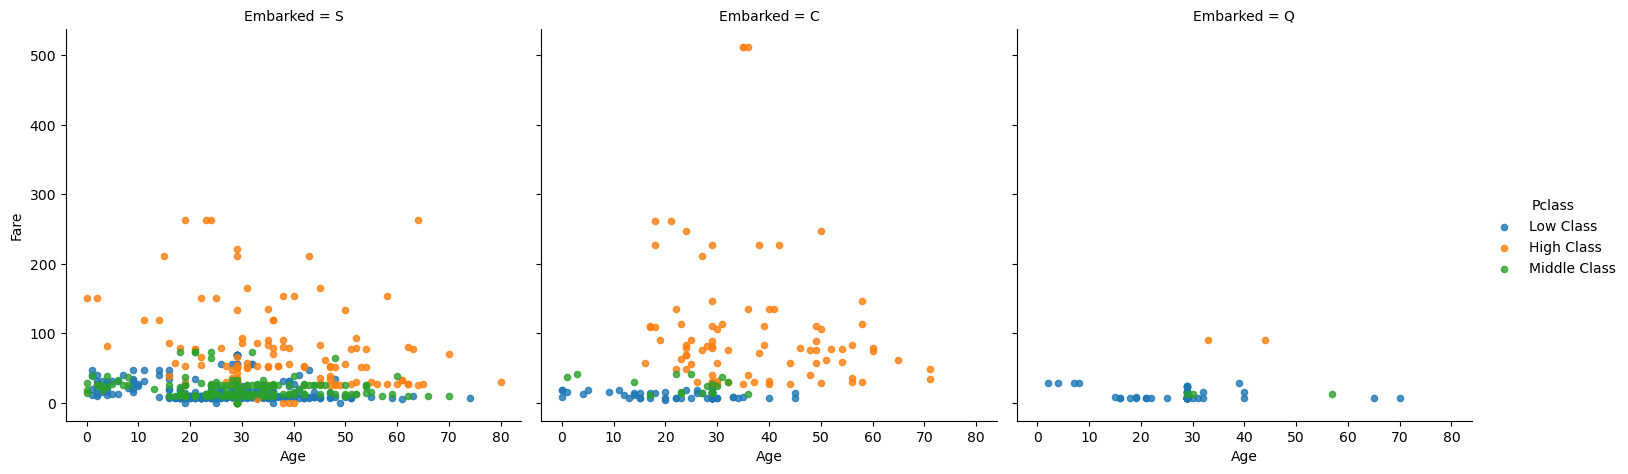

In [98]:
sns.lmplot('Age', 'Fare', data=df, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)

Important Observations:
   * More numbers of males.
   * Survival rate higher of females.
   * More people from age 20-30.
   * More people from Southampton.
   * More people in Class 3.
   * More alone people in Class 3.
   * Comparatively More people from QueenStone in class 3.
   * Higher survival in Class 1 .
   * Cheaper fair in class 3. 
   * Least Survival in class 3.

Conclusion:

There were more number of males than females but we can see out of all male passengers most of them died. And out of all Female passengers, most of them survived.So we could say a male passenger has a higher chance to die and female passengers have a higher chance to survive.Maybe priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.Passengers who have age <20 years so childrens or teenagers, out of the numbers of passengers who survived is greater than numbers of people who died. This means while Rescuing priorities were given to children or teenagers.Persons who have age >20 years and <45 years. Out of the numbers of passengers who died is greater than numbers of passengers who survived. But people with an age greater than 65 almost all of them died.In the above output plot, we can see Persons who were traveling in 3rd class, most of them died or can not survived than other class passengers.Persons who were traveling in 2nd class, out of them almost equal number of people died and survived.Persons who were traveling in 1st class, out of a large number of people survived and also a fair number of persons died.Passengers who paid low fare have a higher chance to die. On the other hand, passengers who paid high fair have a higher chance to survive.Passengers who started his journey from Southampton, most of them died.However, there is not much difference in people surviving or dying chances on the basis who started their journey from Cherbourg, Queenstown.

## Checking for outliers

In [99]:
##checking outliers for age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Age_outliers = df[(df['Age'] < Q1 - whisker_width*IQR) | (df['Age'] > Q3 + whisker_width*IQR)]
Age_outliers.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone,Fare_Range,Age_Range,Family_Size,Alone
7,8,0,Low Class,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,S,husband,No,"(14.454, 31.0]","(-0.001, 19.0]",4,with Family
11,12,1,High Class,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.550,S,Travel Alone,Yes,"(14.454, 31.0]","(40.0, 80.0]",0,Without Family
15,16,1,Middle Class,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.000,S,Travel Alone,Yes,"(14.454, 31.0]","(40.0, 80.0]",0,Without Family
16,17,0,Low Class,"Rice, Master. Eugene",male,2,4,1,382652,29.125,Q,father,No,"(14.454, 31.0]","(-0.001, 19.0]",5,with Family
33,34,0,Middle Class,"Wheadon, Mr. Edward H",male,66,0,0,C.A. 24579,10.500,S,Travel Alone,Yes,"(7.91, 14.454]","(40.0, 80.0]",0,Without Family


In [100]:
## checking outliers for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = df[(df['Fare'] < Q1 - whisker_width*IQR) | (df['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone,Fare_Range,Age_Range,Family_Size,Alone
1,2,1,High Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,brothers,No,"(31.0, 512.329]","(31.0, 40.0]",1,with Family
27,28,0,High Class,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,S,father,No,"(31.0, 512.329]","(-0.001, 19.0]",5,with Family
31,32,1,High Class,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29,1,0,PC 17569,146.5208,C,brothers,No,"(31.0, 512.329]","(25.0, 29.0]",1,with Family
34,35,0,High Class,"Meyer, Mr. Edgar Joseph",male,28,1,0,PC 17604,82.1708,C,brothers,No,"(31.0, 512.329]","(25.0, 29.0]",1,with Family
52,53,1,High Class,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,C,brothers,No,"(31.0, 512.329]","(40.0, 80.0]",1,with Family


In [101]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Age:  0.45956263424701577
skewness value of Fare:  4.787316519674893


The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value indicates the presence of extreme value or outlier.

From the code above, the ‘Fare’ skewness value of 4.78 shows the variable has been rightly skewed, indicating the presence of outliers.

## Checking outliers using visualization

### Boxplot
Boxplot is a visualization tool for identifying outliers, it displays the distribution of statistical observations, its body is classified into four parts; the lowest and the highest(minimum and maximum), the 25 percentile(first quartile(Q1)), the median(50th percentile), the 75th percentile(third quartile(Q3)).

Outliers appears above or below the minimum and maximum of the boxplot.



C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

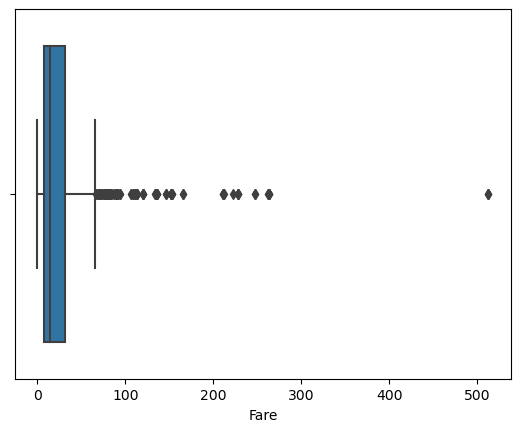

In [102]:
sns.boxplot(df['Fare'],data=df)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

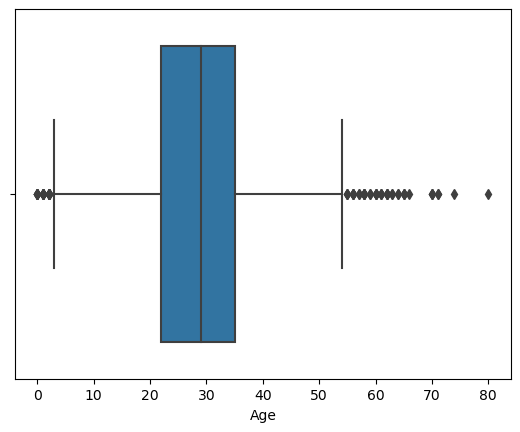

In [103]:
sns.boxplot(df['Age'],data=df)

From the boxplot above, the black circular points which are indicated by an arrow show the presence of extreme values in the variable.

### Histogram
To visualize the distribution of a numerical variable, a histogram shows the direction in which these variables are distributed, outliers will appear outside the overall distribution of the data. if the histogram is right-skewed or left-skewed, it indicates the presence of extreme values or outliers.

<AxesSubplot:>

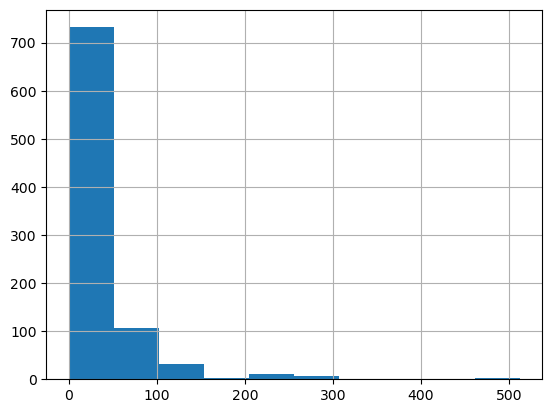

In [104]:
df['Fare'].hist()

From the histogram above, the histogram appears to be distributed to the left, this indicates the presence of outliers.

<AxesSubplot:>

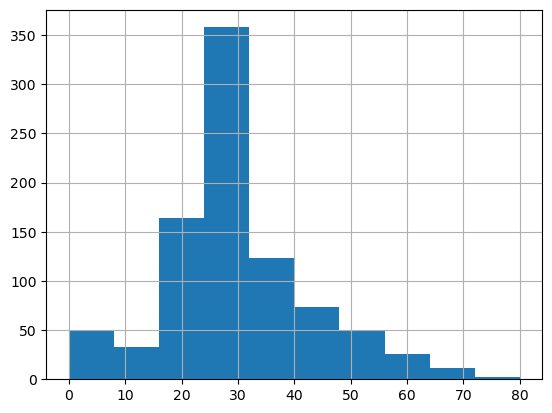

In [105]:
df['Age'].hist()

from the histogram above, the histogram appears to be distributed to the centre, this indicates the presence of outliers in both sides.

## Removing outliers 

In [106]:
#the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile
#of the ‘Fare’ variable.
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

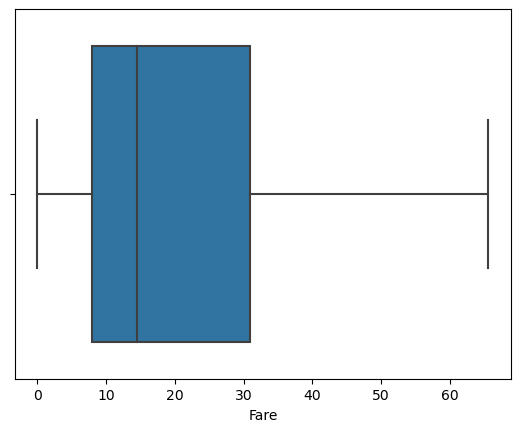

In [62]:
sns.boxplot(df['Fare'],data=df)

In [107]:
#the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile
#of the ‘Age’ variable.
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

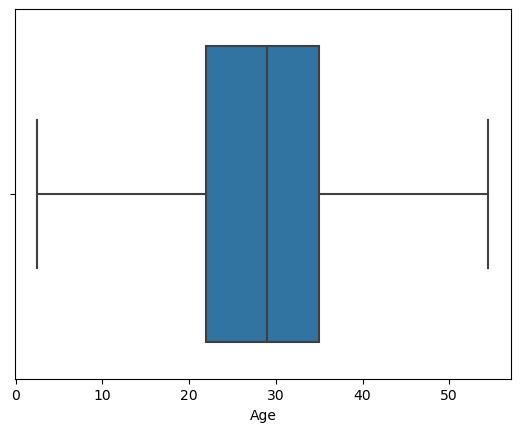

In [65]:
sns.boxplot(df['Age'],data=df)

## Data Preprocessing


In [28]:
#checking for missing values
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
Fare               0
Embarked           0
relatives          0
travelled_alone    0
dtype: int64

In [29]:
##checking for duplicate data
if df.duplicated().sum() == 0:
    print('There is no duplicated data')
else:
    print('There are duplicated data: ', train_data.duplicated().sum())

There is no duplicated data


# Feature Engineering

In Feature Encoding, we coded categorical variables with One Hot Encoding to make machine learning formulations apply the best accuracy

and, the column features that we do one hot encoding are Pclass, Embarked, Travel Alone.


### One hot encoding

In [30]:
df['Pclass'] = df['Pclass'].fillna(df['Pclass'].mode()[0])
dummies_Pclass = pd.get_dummies(df['Pclass'],prefix='Pclass')
df= pd.concat([df, dummies_Pclass], axis=1)

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
dummies_Embarked = pd.get_dummies(df['Embarked'],prefix='Embarked')
df = pd.concat([df, dummies_Embarked], axis=1)

df['travelled_alone'] = df['travelled_alone'].fillna(df['travelled_alone'].mode()[0])
dummies_travel = pd.get_dummies(df['travelled_alone'],prefix='travelled_alone')
df = pd.concat([df, dummies_travel], axis=1)

In [31]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    object 
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    int32  
 5   Age                  891 non-null    int32  
 6   Fare                 891 non-null    float64
 7   Embarked             891 non-null    object 
 8   relatives            891 non-null    object 
 9   travelled_alone      891 non-null    object 
 10  Pclass_High Class    891 non-null    uint8  
 11  Pclass_Low Class     891 non-null    uint8  
 12  Pclass_Middle Class  891 non-null    uint8  
 13  Embarked_C           891 non-null    uint8  
 14  Embarked_Q           891 non-null    uint8  
 15  Embarked_S           891 non-null    uin

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,relatives,travelled_alone,Pclass_High Class,Pclass_Low Class,Pclass_Middle Class,Embarked_C,Embarked_Q,Embarked_S,travelled_alone_No,travelled_alone_Yes
0,1,0,High Class,"Braund, Mr. Owen Harris",0,22,7.2500,S,brothers,No,1,0,0,0,0,1,1,0
1,2,1,Low Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,71.2833,C,brothers,No,0,1,0,1,0,0,1,0
2,3,1,High Class,"Heikkinen, Miss. Laina",1,26,7.9250,S,Travel Alone,Yes,1,0,0,0,0,1,0,1
3,4,1,Low Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,53.1000,S,brothers,No,0,1,0,0,0,1,1,0
4,5,0,High Class,"Allen, Mr. William Henry",0,35,8.0500,S,Travel Alone,Yes,1,0,0,0,0,1,0,1


### Feature Selection

In [32]:
df.drop(['Pclass','Name','Fare', 'Embarked', 'relatives', 'travelled_alone'], axis=1,inplace=True)
df.head(5)

,PassengerId,Survived,Sex,Age,Pclass_High Class,Pclass_Low Class,Pclass_Middle Class,Embarked_C,Embarked_Q,Embarked_S,travelled_alone_No,travelled_alone_Yes
0,1,0,0,22,1,0,0,0,0,1,1,0
1,2,1,1,38,0,1,0,1,0,0,1,0
2,3,1,1,26,1,0,0,0,0,1,0,1
3,4,1,1,35,0,1,0,0,0,1,1,0
4,5,0,0,35,1,0,0,0,0,1,0,1


In [33]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Sex', 'Age', 'Pclass_High Class',
        'Pclass_Low Class', 'Pclass_Middle Class', 'Embarked_C', 'Embarked_Q',
        'Embarked_S', 'travelled_alone_No', 'travelled_alone_Yes'],
       dtype='object'))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   PassengerId          891 non-null    int64
 1   Survived             891 non-null    int64
 2   Sex                  891 non-null    int32
 3   Age                  891 non-null    int32
 4   Pclass_High Class    891 non-null    uint8
 5   Pclass_Low Class     891 non-null    uint8
 6   Pclass_Middle Class  891 non-null    uint8
 7   Embarked_C           891 non-null    uint8
 8   Embarked_Q           891 non-null    uint8
 9   Embarked_S           891 non-null    uint8
 10  travelled_alone_No   891 non-null    uint8
 11  travelled_alone_Yes  891 non-null    uint8
dtypes: int32(2), int64(2), uint8(8)
memory usage: 28.0 KB


### Modeling

In [35]:
Modelling_Train = df.iloc[:891,]
Modelling_Test = df.iloc[891:,]

In [36]:
Modelling_Train.shape, Modelling_Test.shape

((891, 12), (0, 12))

Splitting the dataset into train and test datasets, 70% Train Data + 30% Test Data

In [37]:
X = Modelling_Train.drop(['Survived'],axis=1)
y = Modelling_Test['Survived']
              
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', 1), df['Survived'], test_size = .3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11572\3337734614.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', 1), df['Survived'], test_size = .3)


# Machine Learning Model

In [38]:
#Import Modelling modules
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import randint
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score


def models(models):
  results = pd.DataFrame({'accuracy_train':[],'accuracy_test':[],
                          'recall_train':[], 'recall_test':[],
                          'precision_train':[],'precision_test':[],
                          'AUC_train': [], 'AUC_test': [], 
                          'f1_score_train':[], 'f1_score_test':[]})
  

  for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    #auc_score_train = auc(fpr, tpr)
    results = results.append({'accuracy_train': accuracy_score(y_train, model.predict(X_train)),
                              'accuracy_test': accuracy_score(y_test, model.predict(X_test)),
                              'recall_train': recall_score(y_train, model.predict(X_train), average='macro'),
                              'recall_test': recall_score(y_test, model.predict(X_test), average='macro'),
                              'precision_train': precision_score(y_train, model.predict(X_train), average='macro'),
                              'precision_test': precision_score(y_test, model.predict(X_test), average='macro'),
                              'AUC_train': roc_auc_score(y_train, model.predict(X_train)),
                              'AUC_test': roc_auc_score(y_test, model.predict(X_test)),
                              'f1_score_train': metrics.f1_score(y_train, model.predict(X_train)),
                              'f1_score_test':  metrics.f1_score(y_test, model.predict(X_test))
                              }, ignore_index=True)
    

   
  
  results['model'] = ['Logistic Regression', 'KNN','SVM','Naive Bayes', 'Decision Tree', 'Random Forest']
  return results

In [40]:
models([LogisticRegression(), KNeighborsClassifier(), SVC(),GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier()])

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Acer\AppData\Local\Temp\ipykernel_11572\4279788899.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'accuracy_train': accuracy_score(y_train, model.predict(X_train)),
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` ty

C:\Users\Acer\AppData\Local\Temp\ipykernel_11572\4279788899.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'accuracy_train': accuracy_score(y_train, model.predict(X_train)),


,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,AUC_train,AUC_test,f1_score_train,f1_score_test,model
0,0.789727,0.805970,0.774124,0.784544,0.782552,0.787426,0.774124,0.784544,0.725367,0.720430,Logistic Regression
1,0.706260,0.541045,0.666554,0.468024,0.701881,0.462608,0.666554,0.468024,0.561151,0.254545,KNN
2,0.601926,0.649254,0.500000,0.500000,0.300963,0.324627,0.500000,0.500000,0.000000,0.000000,SVM
3,0.752809,0.742537,0.746188,0.730802,0.742588,0.720567,0.746188,0.730802,0.696850,0.653266,Naive Bayes
4,1.000000,0.738806,1.000000,0.732820,1.000000,0.719102,1.000000,0.732820,1.000000,0.656863,Decision Tree
5,1.000000,0.772388,1.000000,0.753791,1.000000,0.750256,1.000000,0.753791,1.000000,0.680628,Random Forest


The machine learning model with Random Forest and Decision Tree Algorithm had a perfect score train/test score. For further evaluation, the researcher used the Random Forest model to advance evaluation, with train accuracy 100 %, test accuracy 79%, precision train and test 100% / 76%, AUC train 100%, AUC test 76%, F1 Score train and test have 100% and 71%


### Evaluation

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [42]:
scores = cross_val_score(rf, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores [0.816      0.768      0.792      0.75       0.75806452]
Cross-Validation Accuracy Scores 0.7768129032258064


## HyperParameter Turing

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
%timeit

param_grid = [
{'criterion':['gini', 'entropy'],'n_estimators': [25, 50, 100], 'max_features': ['auto', 'log2'], 
'max_depth': [25, 50, 100],
'min_samples_split':[2, 5, 10], 'min_samples_leaf':[4, 8, 16], 'bootstrap': [True, False]}
 ]

rf = RandomForestClassifier(random_state=42)

grid_search_forest = GridSearchCV(rf, param_grid, cv=5)
grid_search_forest.fit(X_train, y_train)

grid_search_forest.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [44]:
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=25,
                       min_samples_leaf=16, n_estimators=50, random_state=42)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[159  15]
 [ 35  59]]


Accuracy of Random Forest: 81.34328358208955 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       174
           1       0.80      0.63      0.70        94

    accuracy                           0.81       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.81      0.81      0.81       268



## Feature Importance 

Text(0.5, 1.0, 'feature importance score')

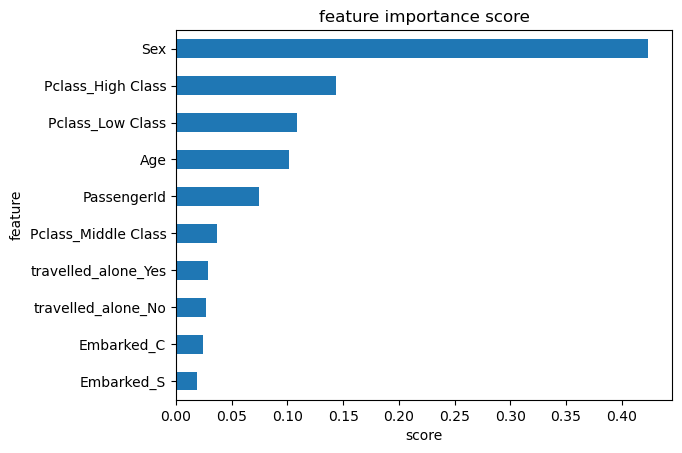

In [45]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Feature like Sex and Pclass plays very significant role in determining the survival.

The modeling was carried out on the Titanic dataset, which included Logistic Regression, Naive Bayes, Support Vector Machine, K-Nearest Neighbors, Decision Tree and Random Forest.The results of the modeling above show that Decision Tree and Random Forest have the most significant numbers of all the modeling algorithms carried.As a result, further evaluation was done using Random Forest since it was found to be the most suitable elements.In conclusion from the entire sample it shows Gender and Pclass (Social Economic Class) are the factors that influence the high death toll in the Titanic disaster.